### import necessary libraries

In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt    

### load dataset

In [30]:

path = "../WebScraping/paragraphs.txt"
with open(path, 'r', encoding='utf-8') as file:
    football_history = file.read()

### Reading Text File Content

In [31]:
football_history

"\n\nWelcome to FootballHistory.org, a website about football history including competitions, teams and players.\n\nFootball (or soccer as the game is called in some parts of the world) has a long history. Football in its current form arose in England in the middle of the 19th century. But alternative versions of the game existed much earlier and are a part of the football history.\n\nThe first known examples of a team game involving a ball, which was made out of a rock, occurred in old Mesoamerican cultures for over 3,000 years ago.  It was by the Aztecs calledTchatali, although various versions of the game were spread over large regions. In some ritual occasions, the ball would symbolize the sun and the captain of the losing team would be sacrificed to the gods. A unique feature of the Mesoamerican ball game versions was a bouncing  ball made of rubber â\x80\x93  no other early culture had access to rubber.The first known ball game which also involved kicking took place In China in t

### Tokenizing the text document content

In [32]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts([football_history])

In [33]:
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1,
 'word_counts': '{"welcome": 1, "to": 43, "footballhistory": 1, "org": 2, "a": 46, "website": 1, "about": 5, "football": 55, "history": 8, "including": 1, "competitions": 1, "teams": 13, "and": 68, "players": 9, "or": 4, "soccer": 2, "as": 15, "the": 218, "game": 30, "is": 11, "called": 3, "in": 98, "some": 5, "parts": 3, "of": 74, "world": 14, "has": 8, "long": 9, "its": 4, "current": 1, "form": 3, "arose": 1, "england": 9, "middle": 1, "19th": 5, "century": 12, "but": 13, "alternative": 1, "versions": 4, "existed": 3, "much": 3, "earlier": 1, "are": 8, "part": 2, "first": 20, "known": 5, "examples": 2, "team": 4, "involving": 2, "ball": 23, "which": 9, "was": 58, "made": 4, "out": 1, "rock": 1, "occurred": 4, "old": 1, "mesoamerican": 2, "cultures": 1, "for": 21, "over": 4, "3": 1, "000": 5, "years": 3, "ago": 1, "it": 

### Get the Each Token index

In [34]:
tokenizer.word_index

{'the': 1,
 'in': 2,
 'of': 3,
 'and': 4,
 'was': 5,
 'football': 6,
 'a': 7,
 'to': 8,
 'game': 9,
 'ball': 10,
 'would': 11,
 'for': 12,
 'first': 13,
 'it': 14,
 'by': 15,
 'other': 16,
 'that': 17,
 'with': 18,
 'as': 19,
 'games': 20,
 'from': 21,
 'world': 22,
 'were': 23,
 'teams': 24,
 'but': 25,
 'be': 26,
 'century': 27,
 'played': 28,
 'british': 29,
 'is': 30,
 'on': 31,
 'this': 32,
 'not': 33,
 'time': 34,
 'cup': 35,
 'fifa': 36,
 'players': 37,
 'long': 38,
 'england': 39,
 'which': 40,
 'at': 41,
 'association': 42,
 'history': 43,
 'has': 44,
 'are': 45,
 'had': 46,
 'an': 47,
 'more': 48,
 'sport': 49,
 'clubs': 50,
 'also': 51,
 'been': 52,
 'included': 53,
 'people': 54,
 'rugby': 55,
 'took': 56,
 'place': 57,
 'rules': 58,
 'national': 59,
 'de': 60,
 'about': 61,
 'some': 62,
 '19th': 63,
 'known': 64,
 '000': 65,
 'â\x80\x93': 66,
 'no': 67,
 'early': 68,
 'involved': 69,
 'later': 70,
 'name': 71,
 'many': 72,
 'have': 73,
 'however': 74,
 'important': 75,
 't

In [35]:
input_sequences = []
for sentence in football_history.split('\n'):
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        sequence = token_list[:i+1]
        input_sequences.append(sequence)

In [36]:
input_sequences[:5]

[[259, 8],
 [259, 8, 260],
 [259, 8, 260, 153],
 [259, 8, 260, 153, 7],
 [259, 8, 260, 153, 7, 261]]

### Get the Maximum length array size

In [37]:
max_length = max([len(input_sequence) for input_sequence in input_sequences])
max_length 

337

### add padding

In [38]:

input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_length, padding='pre'))

### divide dataset into feature set (X) and labels (y)

In [39]:

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
     

### number of Unique words

In [40]:
num_classes = len(tokenizer.word_index)+1

### one-hot encoding labels

In [41]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=num_classes))

### model building

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(num_classes, 80, input_length=max_length-1)) 
model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


# num_classes = total unique words or tokens in your dataset
# 80 = embedding dimension
# max_length-1 = input_length
# 100 = number of neurons in LSTM layer
# softmax = activation function for multi-class classification

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 336, 80)           64560     
                                                                 
 lstm_1 (LSTM)               (None, 100)               72400     
                                                                 
 dense_1 (Dense)             (None, 807)               81507     
                                                                 
Total params: 218467 (853.39 KB)
Trainable params: 218467 (853.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
# model training
epoch = 100
history = model.fit(X, y, epochs=epoch)

Epoch 1/100
74/74 [==============================] - 30s 247ms/step - loss: 6.2029 - accuracy: 0.0851
Epoch 2/100
74/74 [==============================] - 19s 254ms/step - loss: 5.7092 - accuracy: 0.0911
Epoch 3/100
74/74 [==============================] - 19s 253ms/step - loss: 5.6232 - accuracy: 0.0911
Epoch 4/100
74/74 [==============================] - 23s 314ms/step - loss: 5.5409 - accuracy: 0.0911
Epoch 5/100
74/74 [==============================] - 24s 320ms/step - loss: 5.4467 - accuracy: 0.0911
Epoch 6/100
74/74 [==============================] - 25s 336ms/step - loss: 5.3268 - accuracy: 0.1064
Epoch 7/100
74/74 [==============================] - 25s 335ms/step - loss: 5.1849 - accuracy: 0.1281
Epoch 8/100
74/74 [==============================] - 34s 462ms/step - loss: 5.0496 - accuracy: 0.1417
Epoch 9/100
74/74 [==============================] - 26s 355ms/step - loss: 4.9251 - accuracy: 0.1468
Epoch 10/100
74/74 [==============================] - 24s 330ms/step - loss: 4.807

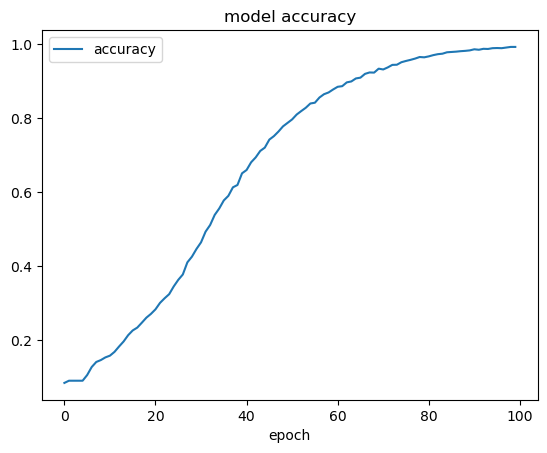

In [48]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.legend()
plt.title('model accuracy')
plt.xlabel('epoch')
plt.show()


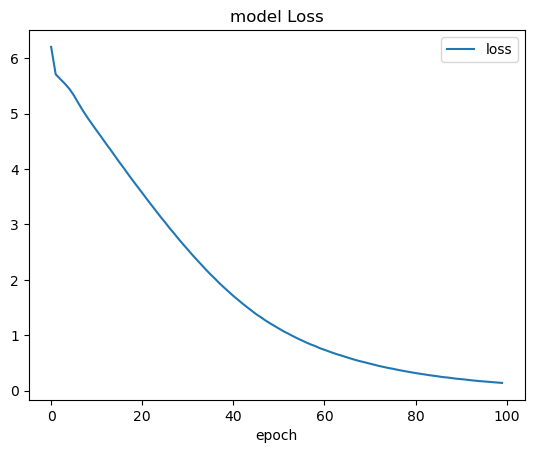

In [49]:
plt.plot(history.history['loss'],label="loss")
plt.legend()
plt.title('model Loss')
plt.xlabel('epoch')
plt.show()

### save the model

In [50]:
model.save("Next_word_Prediction.h5")

c:\Users\Admin\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load the save model

In [51]:
final_model = tf.keras.models.load_model("./Next_word_Prediction.h5")

### Prediction Phase 

In [52]:
no_of_words_predict = 6
input_text = "Football clubs"
for i in range(no_of_words_predict):
    token_list = tokenizer.texts_to_sequences([input_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_length-1, padding='pre')
    predicted = np.argmax(final_model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

1/1 [==============================] - 0s 81ms/step
Football clubs have existed since the 15th century
